In [357]:
import numpy as np
import matplotlib.pyplot as plt

In [358]:
def power(A,n):
  return A**n
def factorial(x):
  res=1
  for i in range(1,x+1):
    res*=i
  return res
def matrix_exp(A):
  M=np.eye(A.shape[0],A.shape[1])
  M=0
  for n in range(0,50):
    M = M + power(A,n)/factorial(n)
  return M



\begin{equation}
N\mathcal{ \in \mathbb{N}}
\end{equation}
\begin{equation} 
\vec{t}=
\begin{pmatrix}
t_0 , t_1 , t_2 \text{ . . . . } t_N
\end{pmatrix}
\end{equation}
\begin{equation}
\Delta_t = t_1 - t_0 = \frac{1}{N-1}
\end{equation}

In [359]:
N=2000
a=0
b=1
t = np.linspace(a, b, N)

\begin{equation}{\text{f(t)}=sin(31t) + sin(10t) + sin(70t)}
\end{equation}

In [360]:
def f(t):
    
    s=0
    sinuses=[150,347,745]
    for i in range(len(sinuses)):
        s += np.sin(sinuses[i] * 2 * np.pi * t)
    return s

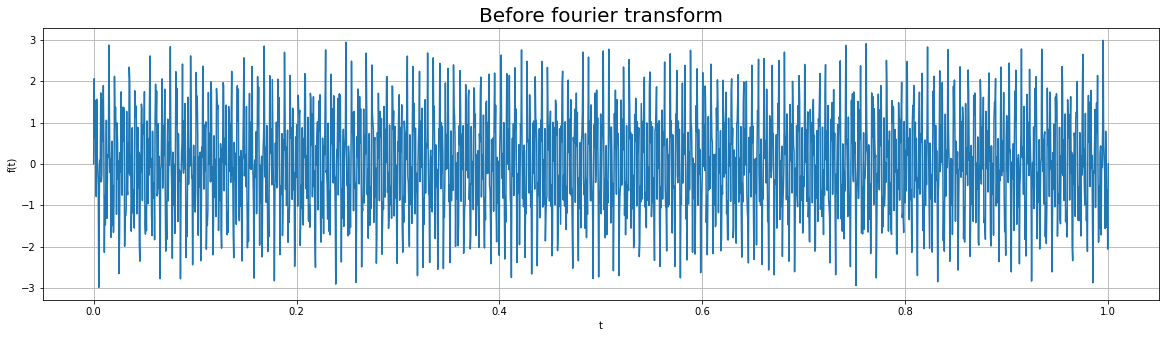

In [361]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(t, f(t), label = r'$y=f(x)$')
ax.set_title(f"Before fourier transform", fontsize = 20)
ax.set_ylabel("f(t)")
ax.set_xlabel("t")
ax.grid(True)

\begin{equation} 
\vec{n}=
\begin{pmatrix}
0 , 1 , 2 ,\ldots, N
\end{pmatrix}_{1\times{N}}
\end{equation}



\begin{equation} 
\vec{k}=
\begin{pmatrix}0 \\ 1 \\ 2 \\\vdots\\ N \end{pmatrix}_{N\times{1}}
\end{equation}

In [362]:
n = np.arange(N) 
k = n.reshape((N, 1))

\begin{equation} 
\bar{M}=
\vec{n}\cdot{\vec{k}}=
\begin{pmatrix}
0 , 1 , 2 ,\ldots, N
\end{pmatrix}\cdot{ \begin{pmatrix}0 \\ 1 \\ 2 \\\vdots\\ N \end{pmatrix}}=
\begin{pmatrix}
n_1k_1 & n_1k_2 & \cdots & n_1k_N
 \\ n_2k_1 & n_2k_2 & \cdots & n_2k_N
 \\ \vdots & \vdots & \ddots & \vdots
 \\ n_Nk_1 & n_Nk_2 & \cdots & n_Nk_N
\end{pmatrix}_{N\times{N}}
\end{equation}




In [363]:
M=n*k

\begin{equation}
\bar{A}=
{-\frac{j2\pi}{N}\bar{M}}=
\begin{pmatrix}
-\frac{j2\pi}{N}n_1k_1 & -\frac{j2\pi}{N}n_1k_2 & \cdots & -\frac{j2\pi}{N}n_1k_N
 \\ -\frac{j2\pi}{N}n_2k_1 & -\frac{j2\pi}{N}n_2k_2 & \cdots & -\frac{j2\pi}{N}n_2k_N
 \\ \vdots & \vdots & \ddots & \vdots
 \\ -\frac{j2\pi}{N}n_Nk_1 & -\frac{j2\pi}{N}n_Nk_2 & \cdots & -\frac{j2\pi}{N}n_Nk_N
\end{pmatrix}_{N\times{N}}
\end{equation}

$$e^z = \sum_{n=0}^{∞} \frac{z^n}{n!}\Rightarrow
e^{A}= \sum_{n=0}^{∞} \frac{A^n}{n!} 
\Rightarrow
e^{At}= \sum_{n=0}^{∞} \frac{t^nA^n}{n!}=e^{At}= \sum_{n=0}^{∞} \frac{(tA)^n}{n!} $$
$$\Downarrow$$







$$e^{A}=\sum_{n=0}^{∞} \frac{-\frac{j2\pi}{N}^nM^n}{n!}= \sum_{n=0}^{∞} \frac{(-\frac{j2\pi}{N}M)^n}{n!}= \sum_{n=0}^{∞} \frac{A^n}{n!} $$

In [364]:
A=-2j*np.pi * M / N

$$\mathcal{F(f(t))}=e^A\cdot{\text{f(t)}}$$

In [365]:
#Compute the discrete Fourier Transform of the signal f(t)
dft = np.exp(A).dot(f(t))

$$\Delta_t=t_1-t_0=\frac{1}{N-1}$$
$$\mathcal{\vec{f}} = \frac{\vec{t}}{\Delta_t}=\begin{pmatrix}
f_0 , f_1 , f_2 \text{ . . . . } f_N
\end{pmatrix} $$


In [366]:
delta_t = t[1] - t[0]
freq=t/delta_t 

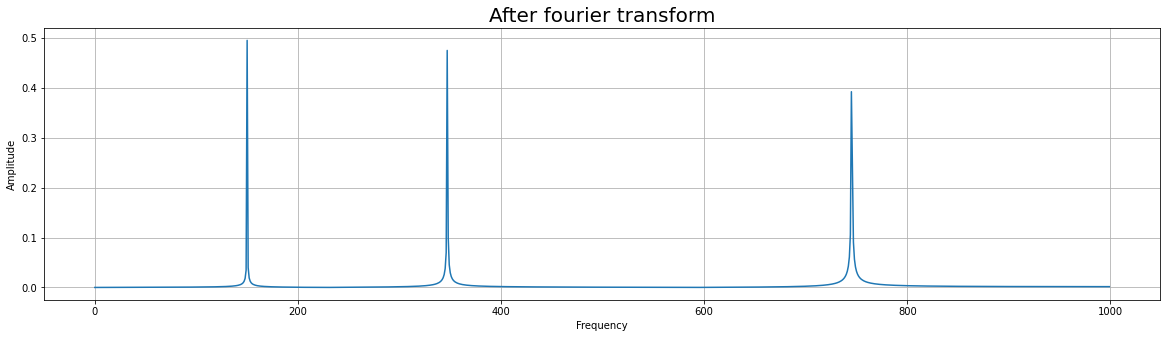

In [367]:
fig = plt.figure(figsize=(20,5))
ax2 = fig.add_subplot(1,1,1)
ax2.plot(freq[:N//2], np.abs(dft)[:N//2] * 1/N, label = r'$f=fft(s)$')
ax2.set_title(f"After fourier transform", fontsize = 20)
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Frequency")
ax2.grid(True)
plt.show()

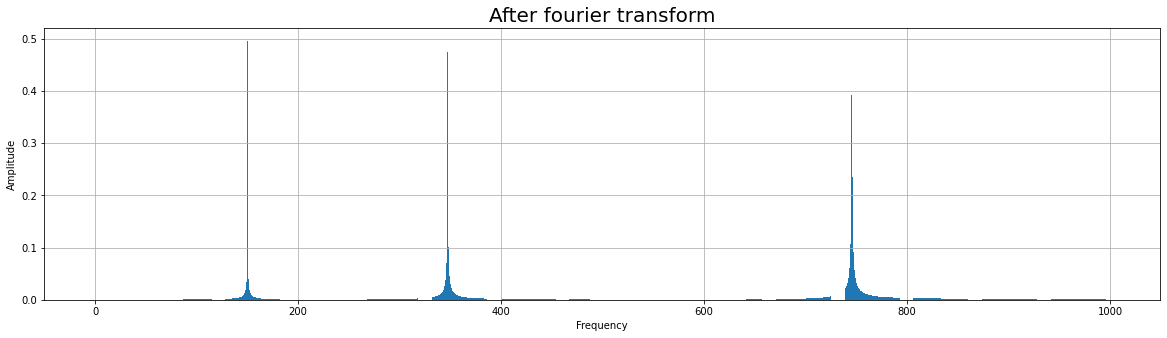

In [368]:
fig = plt.figure(figsize=(20,5))
ax2 = fig.add_subplot(1,1,1)
ax2.bar(freq[:N//2], np.abs(dft)[:N//2] * 1/N, label = r'$f=fft(s)$')
ax2.set_title(f"After fourier transform", fontsize = 20)
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Frequency")
ax2.grid(True)
plt.show()